## Model Diagnosis and Tuning

Throughout this presentation we’ll mostly be using a dataset from the UCI repository,
“Pima Indian diabetes,” which has 768 records, 8 attributes, 2 classes, 268 (34.9%)
positive results for a diabetes test, and 500 (65.1%) negative results. All patients were
females at least 21 years old of Pima Indian heritage.
Attributes of the dataset:

1. Number of times pregnant
2. Plasma glucose concentration at 2 hours in an oral glucose
tolerance test
3. Diastolic blood pressure (mmHg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)






### Optimal Probability Cutoff Point

In [10]:
# Load Data and Check the Class Distribution
import pandas as pd
import pylab as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# read the data 
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Copy of Diabetes.csv")

# target variable % distribution
#print (df['class'].value_counts(normalize=True))

In [ ]:
df.head()

,preg_count,glucose_concentration,blood_pressure,skin_thickness,serum_insulin,bmi,pedigree_function,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let’s build a quick logistic regression model and check the accuracy 


In [ ]:
# Build a Logistic Regression Model and Evaluate the Performance
X = df.iloc[:,:8] # independent variables
y = df['class'] # dependent variables
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [ ]:
# instantiate a logistic regression model, and fit
model = LogisticRegression()
model = model.fit(X_train, y_train)
# predict class labels for the train set. The predict fuction converts probability values > .5 to 1 else 0
y_pred = model.predict(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# generate class probabilities
# Notice that 2 elements will be returned in probs array,
# 1st element is probability for negative class,
# 2nd element gives probability for positive class
probs = model.predict_proba(X_train)
y_pred_prob = probs[:, 1]
# generate evaluation metrics
print ("Accuracy: ", metrics.accuracy_score(y_train, y_pred))

Accuracy:  0.7635009310986964


In [ ]:
print(probs[0:3])

[[0.39533384 0.60466616]
 [0.97525852 0.02474148]
 [0.65830092 0.34169908]]


The optimal cut-off would be where the true positive rate (tpr) is high and the false
positive rate (fpr) is low, and tpr - (1-fpr) is zero or near to zero.


#### Find Optimal Cutoff Point



In [ ]:
# extract false positive, true positive rate
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_prob)
roc_auc = metrics.auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i),'1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i),'thresholds' : pd.Series(thresholds,index = i)})
roc.iloc[(roc.tf).abs().argsort()[:1]]


Area under the ROC curve : 0.162484


,fpr,tpr,1-fpr,tf,thresholds
82,0.746356,0.252577,0.253644,-0.001067,0.661227


In [ ]:
(roc.tf).abs().sort_values()

82     0.001067
81     0.003982
83     0.004088
84     0.009919
80     0.014292
         ...   
3      0.971522
2      0.976676
1      0.997085
0      1.000000
175    1.000000
Name: tf, Length: 176, dtype: float64

In [ ]:
i

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175])

In [ ]:
roc

,fpr,tpr,1-fpr,tf,thresholds
0,0.000000,0.000000,1.000000,-1.000000,1.991621
1,0.000000,0.005155,1.000000,-0.994845,0.991621
2,0.000000,0.030928,1.000000,-0.969072,0.944584
3,0.005831,0.030928,0.994169,-0.963241,0.938808
4,0.005831,0.067010,0.994169,-0.927159,0.904620
...,...,...,...,...,...
171,0.956268,0.989691,0.043732,0.945959,0.028650
172,0.956268,0.994845,0.043732,0.951114,0.026778
173,0.976676,0.994845,0.023324,0.971522,0.018517
174,0.976676,1.000000,0.023324,0.976676,0.016887


In [ ]:
metrics.roc_curve(y_train, y_pred_prob)

(array([0.        , 0.        , 0.        , 0.0058309 , 0.0058309 ,
        0.00874636, 0.00874636, 0.01166181, 0.01166181, 0.01457726,
        0.01457726, 0.01749271, 0.01749271, 0.02040816, 0.02040816,
        0.02332362, 0.02332362, 0.03206997, 0.03206997, 0.03790087,
        0.03790087, 0.04081633, 0.04081633, 0.04373178, 0.04373178,
        0.04664723, 0.04664723, 0.05247813, 0.05247813, 0.05539359,
        0.05539359, 0.05830904, 0.05830904, 0.06122449, 0.06122449,
        0.06997085, 0.06997085, 0.07580175, 0.07580175, 0.0787172 ,
        0.0787172 , 0.09037901, 0.09037901, 0.09620991, 0.09620991,
        0.09912536, 0.09912536, 0.10204082, 0.10204082, 0.10495627,
        0.10495627, 0.11370262, 0.11370262, 0.11661808, 0.11661808,
        0.12827988, 0.12827988, 0.13119534, 0.13119534, 0.13411079,
        0.13411079, 0.13994169, 0.13994169, 0.14285714, 0.14285714,
        0.14577259, 0.14577259, 0.14868805, 0.14868805, 0.15451895,
        0.15451895, 0.16034985, 0.16034985, 0.16

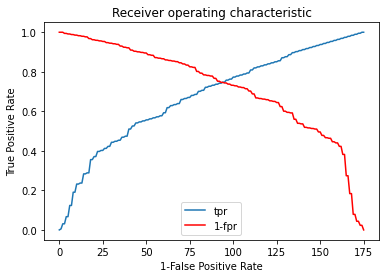

In [ ]:
# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'], label='tpr')
plt.plot(roc['1-fpr'], color = 'red', label='1-fpr')
plt.legend(loc='best')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

From the chart, the point where tpr crosses 1-fpr is the optimal cutoff point. To
simplify finding the optimal probability threshold and enabling reusability, I have made
a function to find the optimal probability cutoff point

#### A Function for Finding Optimal Probability Cutoff


In [ ]:
def Find_Optimal_Cutoff(target, predicted):
 """ Find the optimal probability cutoff point for a classification
model related to the event rate
 Parameters
 ----------
 target: Matrix with dependent or target data, where rows are
observations
 predicted: Matrix with predicted data, where rows are observationsReturns
 -------
 list type, with optimal cutoff value
 """


 fpr, tpr, threshold = metrics.roc_curve(target, predicted)
 i = np.arange(len(tpr))
 roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' :pd.Series(threshold, index=i)})
 roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
 return list(roc_t['threshold']) # Find optimal probability threshold

# Note: probs[:, 1] will have the probability of being a positive label
threshold = Find_Optimal_Cutoff(y_train, probs[:, 1])
print ("Optimal Probability Threshold: ", threshold)


Optimal Probability Threshold:  [0.3395956784720985]


In [ ]:
# Applying the threshold to the prediction probability
y_pred_optimal = np.where(y_pred_prob >= threshold, 1, 0)

# Let's compare the accuracy of traditional/normal approach vs optimal cutoff
print ("\nNormal - Accuracy: ", metrics.accuracy_score(y_train, y_pred))
print ("Optimal Cutoff - Accuracy: ", metrics.accuracy_score(y_train,y_pred_optimal))
print ("\nNormal - Confusion Matrix: \n", metrics.confusion_matrix(y_train, y_pred))
print ("Optimal - Cutoff Confusion Matrix: \n", metrics.confusion_matrix(y_train, y_pred_optimal))


Normal - Accuracy:  0.7635009310986964
Optimal Cutoff - Accuracy:  0.7467411545623837

Normal - Confusion Matrix: 
 [[297  46]
 [ 81 113]]
Optimal - Cutoff Confusion Matrix: 
 [[256  87]
 [ 49 145]]


Notice that there is no significant difference in overall accuracy between normal vs.
optimal cutoff method; both are 76%. However, there is a 36% increase in true positive
rate in the optimal cutoff method (i.e., you are now able to capture 36% more positive
cases as positive). Also, the false positive (Type I error) has doubled (i.e., the probability
of predicting an individual not having diabetes as positive has increased).

In [ ]:
print(y_pred_optimal)

[1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1
 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0
 1 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1
 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1
 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1
 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1
 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1
 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0
 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0
 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 0 0 1 0 0 1 0 1 0 1 

### Rare Event or Imbalanced Dataset
Providing an equal sample of positive and negative instances to the classification
algorithm will result in an optimal result. The dataset that is highly skewed toward one or
more classes has proved to be a challenge.

In [1]:
#Rare Event or Imbalanced Data Handling
# Load libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [2]:
# Generate the dataset with 2 features to keep it simple
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2, n_redundant=0, weights=[0.9, 0.1], random_state=2017)

print ("Positive class: ", y.tolist().count(1))
print ("Negative class: ", y.tolist().count(0))

Positive class:  514
Negative class:  4486


In [14]:
pd.Series(y.tolist()).unique()

array([0, 1])

In [31]:
X

array([[-0.48287516, -0.06087465],
       [-0.20633896, -1.98885131],
       [-0.70047285,  0.76969197],
       ...,
       [-0.71533583, -0.0346717 ],
       [-0.75453649,  0.49548985],
       [-0.92285889,  1.23826571]])

In [33]:
X[y == 0,0]

array([-0.48287516, -0.20633896, -0.70047285, ..., -0.71533583,
       -0.75453649, -0.92285889])

In [ ]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
# Apply the random under-sampling
rus = RandomUnderSampler()
X_RUS, y_RUS = rus.fit_resample(X, y)

# Apply the random over-sampling
ros = RandomOverSampler()
X_ROS, y_ROS = ros.fit_resample(X, y)

# Apply regular SMOTE
sm = SMOTE()
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)


In [29]:
y_SMOTE.tolist().count(0)

4486

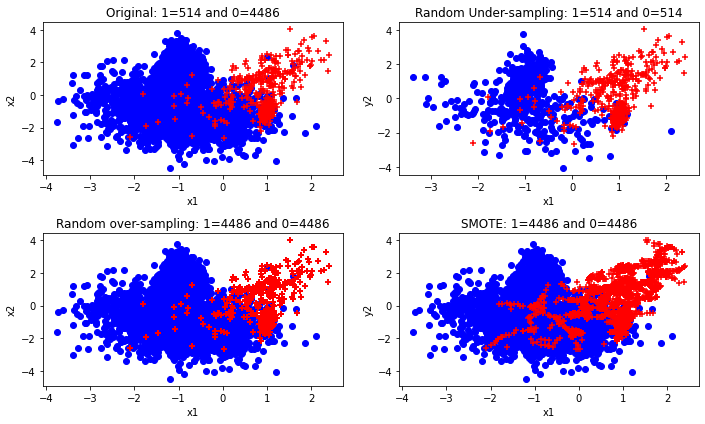

In [34]:

# Original vs resampled subplots
plt.figure(figsize=(10, 6))



# Original
plt.subplot(2,2,1)
plt.scatter(X[y==0,0], X[y==0,1], marker='o', color='blue')
plt.scatter(X[y==1,0], X[y==1,1], marker='+', color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Original: 1=%s and 0=%s' %(y.tolist().count(1), y.tolist().count(0)))


# Random Under Sampling
plt.subplot(2,2,2)
plt.scatter(X_RUS[y_RUS==0,0], X_RUS[y_RUS==0,1], marker='o', color='blue')
plt.scatter(X_RUS[y_RUS==1,0], X_RUS[y_RUS==1,1], marker='+', color='red')
plt.xlabel('x1')
plt.ylabel('y2')
plt.title('Random Under-sampling: 1=%s and 0=%s' %(y_RUS.tolist().count(1), y_RUS.tolist().count(0)))


# Random Over Sampling
plt.subplot(2,2,3)
plt.scatter(X_ROS[y_ROS==0,0], X_ROS[y_ROS==0,1], marker='o', color='blue')
plt.scatter(X_ROS[y_ROS==1,0], X_ROS[y_ROS==1,1], marker='+', color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Random over-sampling: 1=%s and 0=%s' %(y_ROS.tolist().count(1), y_ROS.tolist().count(0)))


# SMOTE
plt.subplot(2,2,4)
plt.scatter(X_SMOTE[y_SMOTE==0,0], X_SMOTE[y_SMOTE==0,1], marker='o',
color='blue')
plt.scatter(X_SMOTE[y_SMOTE==1,0], X_SMOTE[y_SMOTE==1,1], marker='+',
color='red')
plt.xlabel('x1')
plt.ylabel('y2')
plt.title('SMOTE: 1=%s and 0=%s' %(y_SMOTE.tolist().count(1), y_SMOTE.tolist().count(0)))
plt.tight_layout()
plt.show()

#### Build Models on Various Resampling Methods and Evaluate Performance

In [35]:
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_RUS_train, X_RUS_test, y_RUS_train, y_RUS_test = train_test_split(X_RUS,y_RUS, test_size=0.3, random_state=2017)

X_ROS_train, X_ROS_test, y_ROS_train, y_ROS_test = train_test_split(X_ROS,y_ROS, test_size=0.3, random_state=2017)

X_SMOTE_train, X_SMOTE_test, y_SMOTE_train, y_SMOTE_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.3, random_state=2017)


In [36]:
# build a decision tree classifier
clf = tree.DecisionTreeClassifier(random_state=2017)
clf_rus = clf.fit(X_RUS_train, y_RUS_train)
clf_ros = clf.fit(X_ROS_train, y_ROS_train)
clf_smote = clf.fit(X_SMOTE_train, y_SMOTE_train)

In [37]:
# evaluate model performance
print ("\nRUS - Train AUC : ",metrics.roc_auc_score(y_RUS_train, clf.
predict(X_RUS_train)))

print ("RUS - Test AUC : ",metrics.roc_auc_score(y_RUS_test, clf.predict
(X_RUS_test)))

print ("ROS - Train AUC : ",metrics.roc_auc_score(y_ROS_train, clf.
predict(X_ROS_train)))

print ("ROS - Test AUC : ",metrics.roc_auc_score(y_ROS_test, clf.predict
(X_ROS_test)))

print ("\nSMOTE - Train AUC : ",metrics.roc_auc_score(y_SMOTE_train, clf.
predict(X_SMOTE_train)))

print ("SMOTE - Test AUC : ",metrics.roc_auc_score(y_SMOTE_test, clf.
predict(X_SMOTE_test)))


RUS - Train AUC :  0.9805118872454116
RUS - Test AUC :  0.9839646464646465
ROS - Train AUC :  0.9917065390749602
ROS - Test AUC :  0.9605876498806917

SMOTE - Train AUC :  1.0
SMOTE - Test AUC :  0.9542960140553771


## Bias and Variance

A fundamental problem with supervised learning is the bias–variance tradeoff. Ideally,
a model should have two key characteristics:
1. It should be sensitive enough to accurately capture the key
patterns in the training dataset.
2. It should be generalized enough to work well on any unseen
datasets.
Unfortunately, while trying to achieve the aforementioned first point, there is an
ample chance of overfitting to noisy or unrepresentative training data points, leading to
a failure of generalizing the model. On the other hand, trying to generalize a model may
result in failing to capture important regularities 



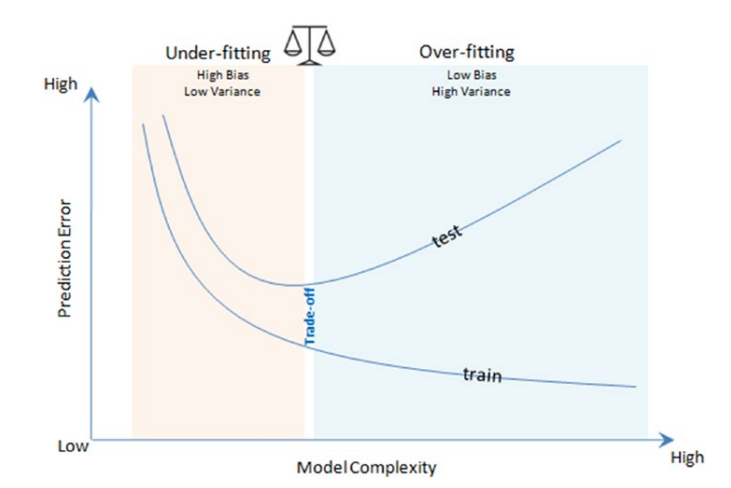

## K-Fold Cross Validation
K-fold cross-validation splits the training dataset into k folds without replacement—any
given data point will only be part of one of the subsets, where k-1 folds are used for the
model training and one fold is used for testing. The procedure is repeated k times so that
we obtain k models and performance estimates 

In [38]:
# import libraries
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree


In [42]:
# read the data in
df = pd.read_csv("/content/drive/MyDrive/DS Specializations/ML/Machine Learning Specialization Script Files/Datasets/Diabetes.csv")
X = df.iloc[:,:8].values # independent variables
y = df['class'].values # dependent variables

In [45]:
len(df.columns)

9

In [46]:
df.head()

,preg_count,glucose_concentration,blood_pressure,skin_thickness,serum_insulin,bmi,pedigree_function,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
# Normalize Data
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [48]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [49]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2017)

In [50]:
# build a decision tree classifier
clf = tree.DecisionTreeClassifier(random_state=2017)

In [51]:
# evaluate the model using 10-fold cross-validation
train_scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
test_scores = cross_val_score(clf, X_test, y_test, scoring='accuracy', cv=5)


print ("Train Fold AUC Scores: ", train_scores)

print ("Train CV AUC Score: ", train_scores.mean())
print ("\nTest Fold AUC Scores: ", test_scores)
print ("Test CV AUC Score: ", test_scores.mean())

Train Fold AUC Scores:  [0.7037037  0.63888889 0.64485981 0.6635514  0.70093458]
Train CV AUC Score:  0.6703876773970231

Test Fold AUC Scores:  [0.70212766 0.67391304 0.76086957 0.65217391 0.67391304]
Test CV AUC Score:  0.6925994449583719


# Stratified K-fold Cross-Validation


In [53]:
from sklearn import model_selection
import numpy as np
kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2019, shuffle=True)
train_scores = []
test_scores = []
k = 0
for (train, test) in kfold.split(X_train, y_train):
 clf.fit(X_train[train], y_train[train])
 train_score = clf.score(X_train[train], y_train[train])
 train_scores.append(train_score)
 
 # score for test set
 test_score = clf.score(X_train[test], y_train[test])
 test_scores.append(test_score)
 k += 1
 print('Fold: %s, Class dist.: %s, Train Acc: %.3f, Test Acc: %.3f'% (k, np.bincount(y_train[train]), train_score, test_score))

 
print('\nTrain CV accuracy: %.3f' % (np.mean(train_scores)))
print('Test CV accuracy: %.3f' % (np.mean(test_scores)))

Fold: 1, Class dist.: [277 152], Train Acc: 1.000, Test Acc: 0.630
Fold: 2, Class dist.: [277 152], Train Acc: 1.000, Test Acc: 0.694
Fold: 3, Class dist.: [278 152], Train Acc: 1.000, Test Acc: 0.757
Fold: 4, Class dist.: [278 152], Train Acc: 1.000, Test Acc: 0.701
Fold: 5, Class dist.: [278 152], Train Acc: 1.000, Test Acc: 0.673

Train CV accuracy: 1.000
Test CV accuracy: 0.691


## Plotting the ROC Curve for Stratified K-fold Cross-Validation


In [54]:
from sklearn.metrics import roc_curve, auc
from sklearn import model_selection
from itertools import cycle
from scipy import interp
import matplotlib.pyplot as plt
import numpy as np

kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2019,shuffle=True)
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2
i = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  


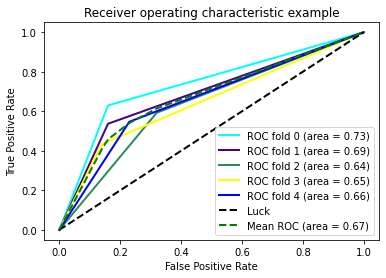

In [55]:
# Compute ROC curve and area the curve
for (train, test), color in zip(kfold.split(X, y), colors):

 probas_ = clf.fit(X[train], y[train]).predict_proba(X[test])
 fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
 mean_tpr += interp(mean_fpr, fpr, tpr)
 mean_tpr[0] = 0.0
 
 roc_auc = auc(fpr, tpr)
 plt.plot(fpr, tpr, lw=lw, color=color, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))
 i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',label='Luck')
mean_tpr /= kfold.get_n_splits(X, y)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--', label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Ensemble Methods
Ensemble methods enable combining multiple model scores into a single score to create
a robust generalized model.

At a high level, there are two types of ensemble methods:
1. Combine multiple models of similar type.
-  Bagging (bootstrap aggregation)
-  Boosting
2. Combine multiple models of various types.
-  Vote classification
-  Blending or stacking


#### Bagging
Bootstrap aggregation (also known as bagging) was proposed by Leo Breiman in 1994;
it is a model aggregation technique to reduce model variance. The training data is split
into multiple samples with a replacement called bootstrap samples. Bootstrap sample
size will be the same as the original sample size, with 3/4 of the original values and
replacement resulting in repetition of values

In [56]:
#Stand-Alone Decision Tree vs. Bagging

# Bagged Decision Trees for Classification
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn import metrics
import pandas as pd


In [57]:
# read the data in
df = pd.read_csv("/content/drive/MyDrive/DS Specializations/ML/Machine Learning Specialization Script Files/Datasets/Diabetes.csv")
X = df.iloc[:,:8].values # independent variables
y = df['class'].values # dependent variables

In [58]:
#Normalize
X = StandardScaler().fit_transform(X)

# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=2019)
kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2019, shuffle = True)

num_trees = 100

Normalization is used when we want to bound our values between two numbers, typically, between [0,1] or [-1,1]. While Standardization transforms the data to have zero mean and a variance of 1,

In [59]:
# Decision Tree with 5 fold cross validation
clf_DT = DecisionTreeClassifier(random_state=2019).fit(X_train,y_train)
results = model_selection.cross_val_score(clf_DT, X_train,y_train, cv=kfold)

print ("Decision Tree (stand alone) - Train : ", results.mean())
print ("Decision Tree (stand alone) - Test : ", metrics.accuracy_score(clf_DT.predict(X_test), y_test))

Decision Tree (stand alone) - Train :  0.6938158070105291
Decision Tree (stand alone) - Test :  0.6623376623376623


In [60]:
# Using Bagging Lets build 100 decision tree models and average/majority vote prediction

clf_DT_Bag = BaggingClassifier(base_estimator=clf_DT, n_estimators=num_trees, random_state=2019).fit(X_train,y_train)

results = model_selection.cross_val_score(clf_DT_Bag, X_train, y_train,cv=kfold)

print ("\nDecision Tree (Bagging) - Train : ", results.mean())
print ("Decision Tree (Bagging) - Test : ", metrics.accuracy_score(clf_DT_Bag.predict(X_test), y_test))


Decision Tree (Bagging) - Train :  0.7410902305744369
Decision Tree (Bagging) - Test :  0.8051948051948052


In [ ]:
# investigate why cross validation score is used

## Feature Importance
The decision tree model has an attribute to show important features, which are based on
the Gini or entropy information gain

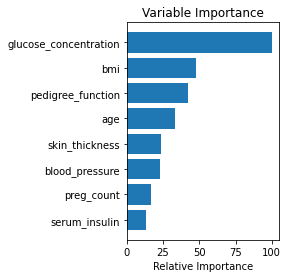

In [61]:
#Decision Tree Feature Importance Function

feature_importance = clf_DT.feature_importances_

# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## RandomForest
A subset of observations and a subset of variables are randomly picked to build multiple
independent tree-based models.

In [62]:
#RandomForest Classifier

from sklearn.ensemble import RandomForestClassifier
num_trees = 100
kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2019, shuffle = True)

clf_RF = RandomForestClassifier(n_estimators=num_trees).fit(X_train,y_train)
results = model_selection.cross_val_score(clf_RF, X_train, y_train, cv=kfold)

print ("\nRandom Forest (Bagging) - Train : ", results.mean())
print ("Random Forest (Bagging) - Test : ", metrics.accuracy_score(clf_RF.predict(X_test), y_test))


Random Forest (Bagging) - Train :  0.7704384912701585
Random Forest (Bagging) - Test :  0.8116883116883117


## Extremely Randomized Trees (ExtraTree)
This algorithm is an effort to introduce more randomness to the bagging process. Tree
splits are chosen completely at random from the range of values in the sample at each
split, which allows reducing the variance of the model

In [63]:
#Extremely Randomized Trees (ExtraTree)

from sklearn.ensemble import ExtraTreesClassifier
num_trees = 100
kfold = model_selection.StratifiedKFold(n_splits=5, random_state=2019, shuffle = True)

clf_ET = ExtraTreesClassifier(n_estimators=num_trees).fit(X_train, y_train)
results = model_selection.cross_val_score(clf_ET, X_train, y_train, cv=kfold)

print ("\nExtraTree - Train : ", results.mean())
print ("ExtraTree - Test : ", metrics.accuracy_score(clf_ET.predict(X_test),y_test))


ExtraTree - Train :  0.752472344395575
ExtraTree - Test :  0.7987012987012987


### How Does the Decision Boundary Look?
Let’s perform PCA and consider only the first two principal components for easy
plotting

In [64]:
#Plot the Decision Boudaries

from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# PCA
X = PCA(n_components=2).fit_transform(X)

def plot_decision_regions(X, y, classifier):
 h = .02 # step size in the mesh

 # setup marker generator and color map
 markers = ('s', 'x', 'o', '^', 'v')
 colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
 cmap = ListedColormap(colors[:len(np.unique(y))])

 # plot the decision surface
 x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
 x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
 xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
 Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
 Z = Z.reshape(xx1.shape)
 plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
 plt.xlim(xx1.min(), xx1.max())
 plt.ylim(xx2.min(), xx2.max())

 for idx, cl in enumerate(np.unique(y)):
   plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],alpha=0.8, c=colors[idx],marker=markers[idx], label=cl) 

 
   

ValueError: ignored

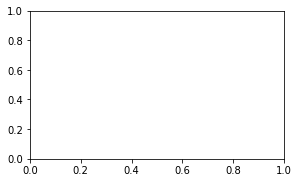

In [65]:
# Plot the decision boundary
plt.figure(figsize=(10,6))
plt.subplot(221)
plot_decision_regions(X, y, clf_DT)
plt.title('Decision Tree (Stand alone)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.subplot(222)
plot_decision_regions(X, y, clf_DT_Bag)
plt.title('Decision Tree (Bagging - 100 trees)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc='best')

plt.subplot(223)
plot_decision_regions(X, y, clf_RF)
plt.title('RandomForest Tree (100 trees)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc='best')

plt.subplot(224)
plot_decision_regions(X, y, clf_ET)
plt.title('Extream Random Tree (100 trees)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(loc='best')
plt.tight_layout()